In [9]:
import pandas as pd
df = pd.read_csv('../cleaned_dataset/labelled_ble_data.csv')

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8520\469108139.py:34: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[idx].boxplot(
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8520\469108139.py:34: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[idx].boxplot(
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8520\469108139.py:34: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[idx].boxplot(


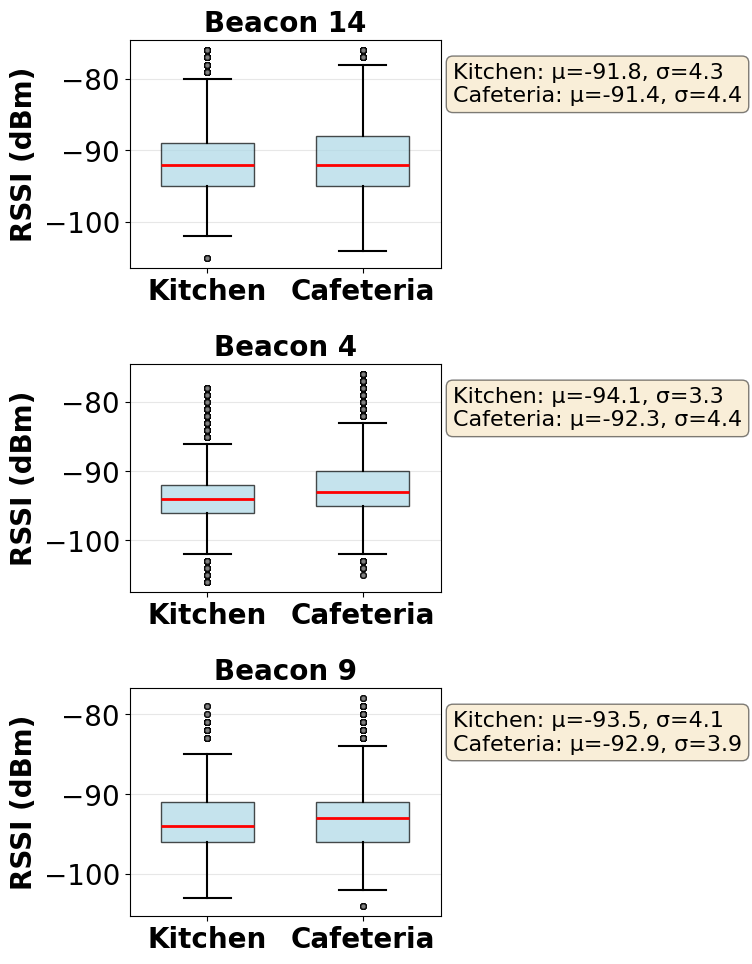

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Filter for Kitchen and Cafeteria only
kitchen_df = df[df['room'] == 'kitchen']
cafeteria_df = df[df['room'] == 'cafeteria']

# Find common beacons between both rooms
kitchen_beacons = set(kitchen_df['mac address'].unique())
cafeteria_beacons = set(cafeteria_df['mac address'].unique())
common_beacons = kitchen_beacons & cafeteria_beacons

# Get top 3 most frequent beacons among the common ones
common_beacon_counts = {}
for beacon in common_beacons:
    count = len(kitchen_df[kitchen_df['mac address'] == beacon]) + \
            len(cafeteria_df[cafeteria_df['mac address'] == beacon])
    common_beacon_counts[beacon] = count

# Sort and get top 3
top_3_common = sorted(common_beacon_counts.items(), key=lambda x: x[1], reverse=True)[:3]
top_3_beacons = [beacon for beacon, count in top_3_common]

# Make the figure much bigger to avoid overlap
fig, axes = plt.subplots(3, 1, figsize=(8, 10))  # Increase both width and height

for idx, beacon in enumerate(top_3_beacons):
    # Get RSSI values for this beacon in both rooms
    kitchen_rssi = kitchen_df[kitchen_df['mac address'] == beacon]['RSSI'].values
    cafeteria_rssi = cafeteria_df[cafeteria_df['mac address'] == beacon]['RSSI'].values

    # Create box plot
    bp = axes[idx].boxplot(
        [kitchen_rssi, cafeteria_rssi],
        labels=['Kitchen', 'Cafeteria'],
        patch_artist=True,
        widths=0.6,
        showfliers=True,
        medianprops=dict(color='red', linewidth=2),
        boxprops=dict(facecolor='lightblue', alpha=0.7),
        whiskerprops=dict(linewidth=1.5),
        capprops=dict(linewidth=1.5),
        flierprops=dict(marker='o', markerfacecolor='gray', markersize=4, alpha=0.5)
    )
    axes[idx].set_ylabel('RSSI (dBm)', fontsize=20, fontweight='bold')
    axes[idx].set_title(f'Beacon {beacon}', fontsize=20, fontweight='bold')
    axes[idx].set_xticklabels(['Kitchen', 'Cafeteria'], fontsize=20, fontweight='bold')
    axes[idx].tick_params(axis='y', labelsize=20)
    axes[idx].tick_params(axis='x', labelsize=20)
    axes[idx].grid(axis='y', alpha=0.3)

    # Calculate and display statistics
    kitchen_mean = np.mean(kitchen_rssi)
    kitchen_std = np.std(kitchen_rssi)
    cafeteria_mean = np.mean(cafeteria_rssi)
    cafeteria_std = np.std(cafeteria_rssi)

    # Add text annotation (put legend outside/above the plot to avoid overlap)
    axes[idx].annotate(
        f'Kitchen: μ={kitchen_mean:.1f}, σ={kitchen_std:.1f}\n'
        f'Cafeteria: μ={cafeteria_mean:.1f}, σ={cafeteria_std:.1f}',
        xy=(1.04, 0.90), xycoords='axes fraction',  # right outside, high up in axes
        fontsize=16,
        ha='left',
        va='top',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    )

plt.tight_layout(rect=[0, 0, 1, 1], pad=2)

# Save to target directory for paper figures
plt.savefig("../paper_figures/rssi_boxplot_kitchen_cafeteria_vertical.png", bbox_inches='tight', dpi=320)
plt.show()
plt.close(fig)

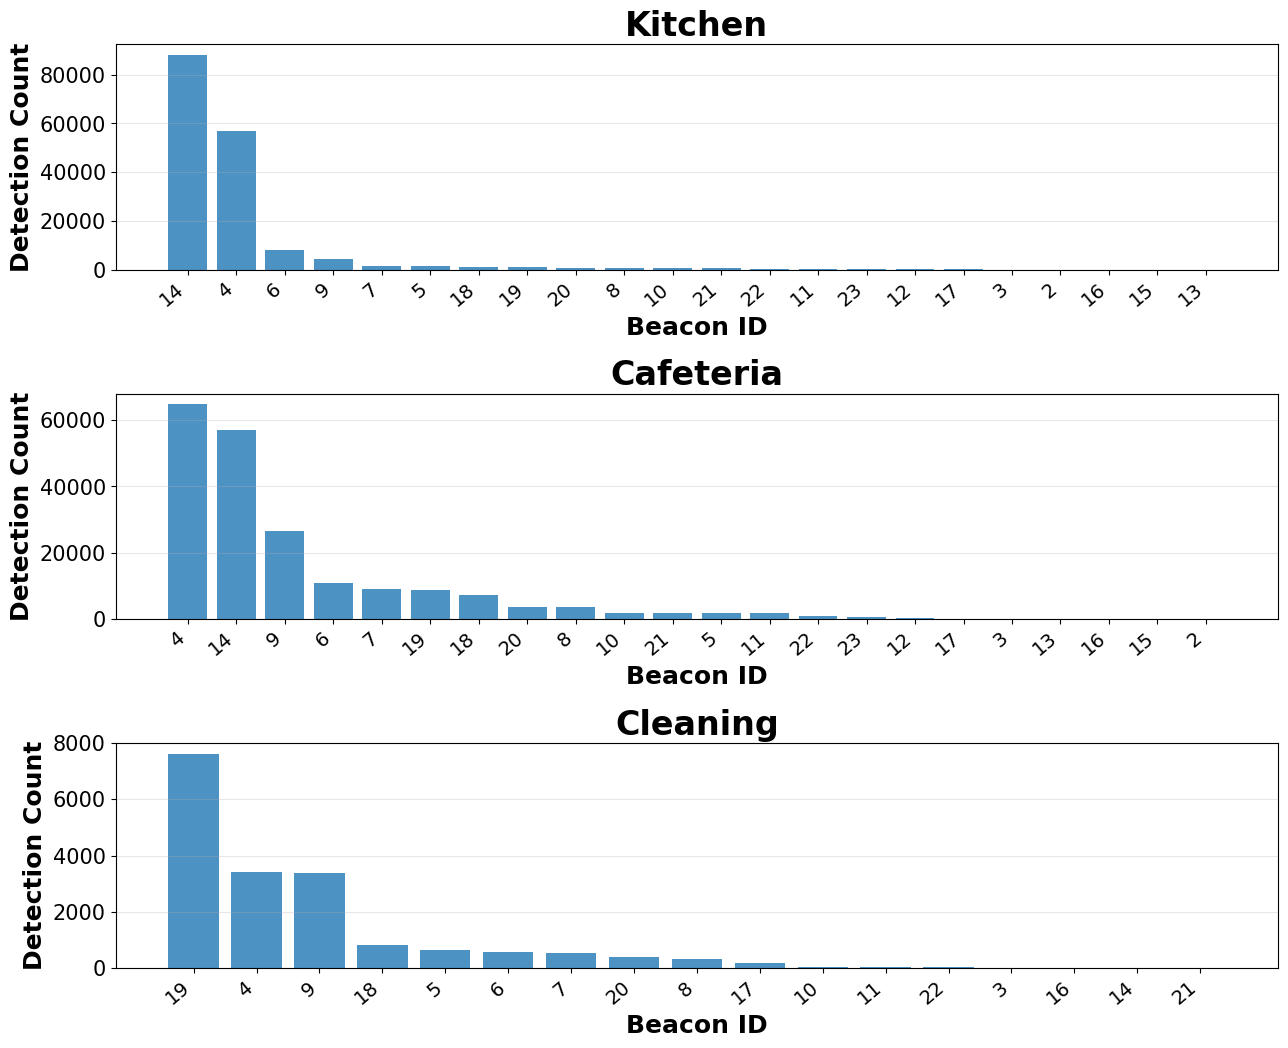

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('../cleaned_dataset/labelled_ble_data.csv')

# Select only 3 rooms to plot
target_rooms = ['kitchen', 'cafeteria', 'cleaning']

# Make the subplots much wider for more readable x-axis labels (e.g., 20x12)
fig, axes = plt.subplots(3, 1, figsize=(15, 12))

for idx, room in enumerate(target_rooms):
    room_data = df[df['room'] == room]['mac address'].value_counts()
    
    axes[idx].bar(range(len(room_data)), room_data.values, color='#1f77b4', alpha=0.8)
    axes[idx].set_title(f'{room.title()}', fontsize=24, fontweight='bold')
    axes[idx].set_xlabel('Beacon ID', fontsize=18, fontweight='bold')
    axes[idx].set_ylabel('Detection Count', fontsize=18, fontweight='bold')
    axes[idx].set_xticks(range(len(room_data)))
    axes[idx].set_xticklabels(room_data.index, rotation=40, ha='right', fontsize=15)
    axes[idx].tick_params(axis='y', labelsize=15)
    axes[idx].tick_params(axis='x', labelsize=14)
    axes[idx].grid(axis='y', alpha=0.3)

# More gap between subplots
plt.subplots_adjust(hspace=0.55)

plt.savefig('../paper_figures/beacon_freq_distribution.png', bbox_inches='tight', dpi=300)
plt.show()

✅ Sequence length histogram function defined


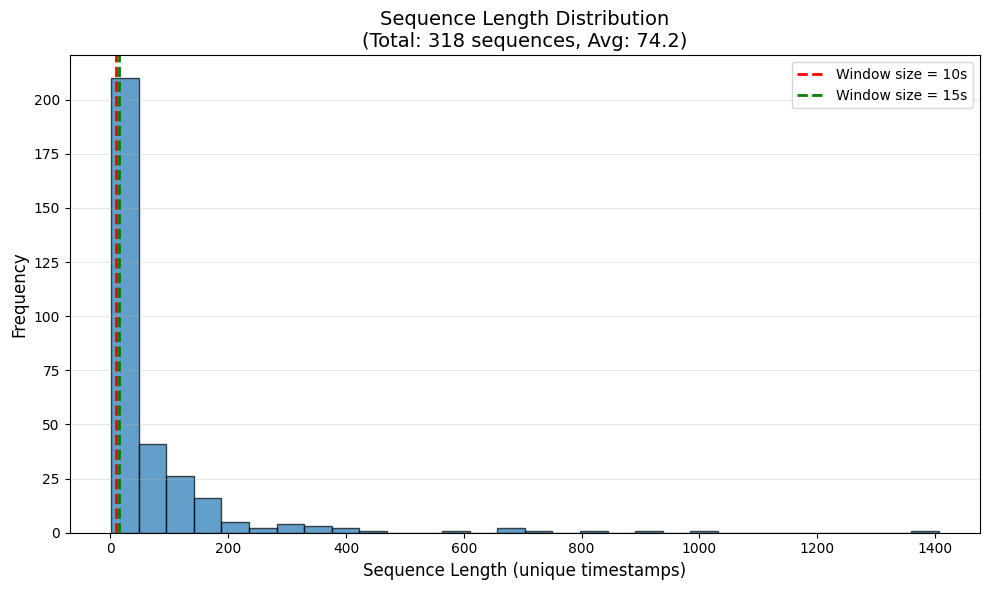

Total sequences: 318
Average sequence length: 74.2
Min sequence length: 1
Max sequence length: 1406
Median sequence length: 24.0


,room_group,room,sequence_length
0,1,kitchen,5
1,2,cafeteria,14
2,3,kitchen,52
3,4,cleaning,13
4,5,nurse station,24
...,...,...,...
313,314,cafeteria,5
314,315,kitchen,104
315,316,523,137
316,317,kitchen,53


In [10]:
import pandas as pd
df = pd.read_csv('../cleaned_dataset/labelled_ble_data.csv')

import matplotlib.pyplot as plt

def plot_sequence_length_histogram(df):
    """
    Plot histogram of sequence lengths for a dataframe.
    A sequence is a consecutive group of rows with the same label/room.
    Sequence length = number of unique timestamps in that sequence.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame containing 'room' and 'timestamp' columns
    
    Returns:
    --------
    sequences : pandas.DataFrame
        DataFrame with sequence information (room_group, room, sequence_length)
    """
    # Create a copy to avoid modifying original
    df_copy = df.copy()
    
    # Sort by timestamp and create room_group column
    df_copy = df_copy.sort_values('timestamp').reset_index(drop=True)
    df_copy['room_group'] = (df_copy['room'] != df_copy['room'].shift()).cumsum()
    
    # Get unique sequences - count UNIQUE timestamps per room_group
    sequences = df_copy.groupby('room_group').agg({
        'room': 'first',
        'timestamp': 'nunique'  # Count unique timestamps, not total records
    }).reset_index()
    sequences.columns = ['room_group', 'room', 'sequence_length']
    
    # Plot histogram
    plt.figure(figsize=(10, 6))
    plt.hist(sequences['sequence_length'], bins=30, edgecolor='black', alpha=0.7)
    
    # Add vertical lines at x=10 and x=15
    plt.axvline(x=10, color='red', linestyle='--', linewidth=2, label='Window size = 10s')
    plt.axvline(x=15, color='green', linestyle='--', linewidth=2, label='Window size = 15s')
    
    plt.xlabel('Sequence Length (unique timestamps)', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.title(f'Sequence Length Distribution\n(Total: {len(sequences)} sequences, Avg: {sequences["sequence_length"].mean():.1f})', 
              fontsize=14)
    plt.legend(fontsize=10)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print(f"Total sequences: {len(sequences)}")
    print(f"Average sequence length: {sequences['sequence_length'].mean():.1f}")
    print(f"Min sequence length: {sequences['sequence_length'].min()}")
    print(f"Max sequence length: {sequences['sequence_length'].max()}")
    print(f"Median sequence length: {sequences['sequence_length'].median():.1f}")
    
    return sequences

print("✅ Sequence length histogram function defined")

plot_sequence_length_histogram(df)

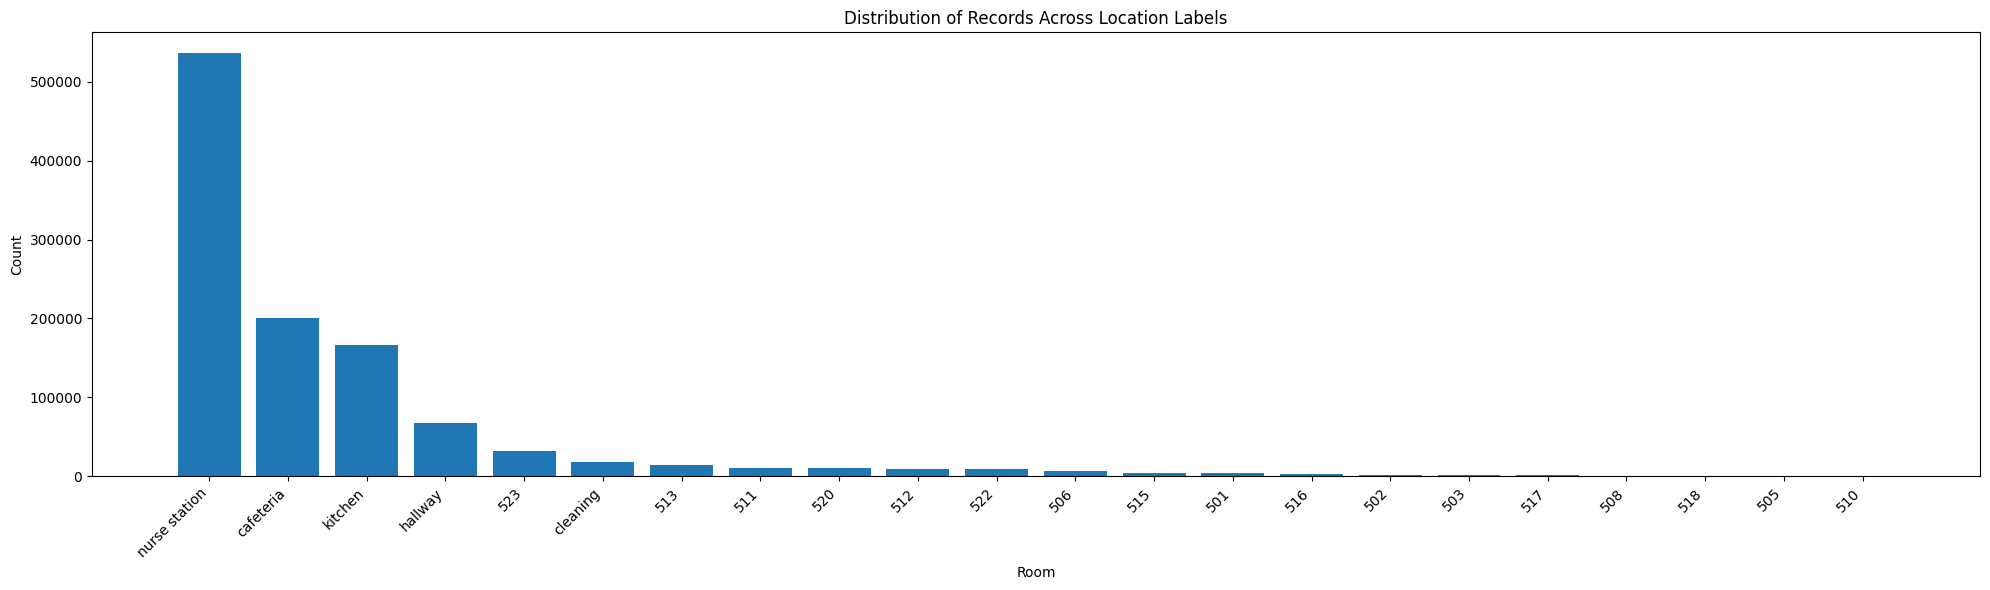

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../cleaned_dataset/labelled_ble_data.csv')

room_counts = df['room'].value_counts()

plt.figure(figsize=(20, 6))   # 👈 wider figure
plt.bar(room_counts.index, room_counts.values)

plt.xlabel('Room')
plt.ylabel('Count')
plt.title('Distribution of Records Across Location Labels')

plt.xticks(rotation=45, ha='right')  # cleaner label alignment
plt.tight_layout()

plt.show()


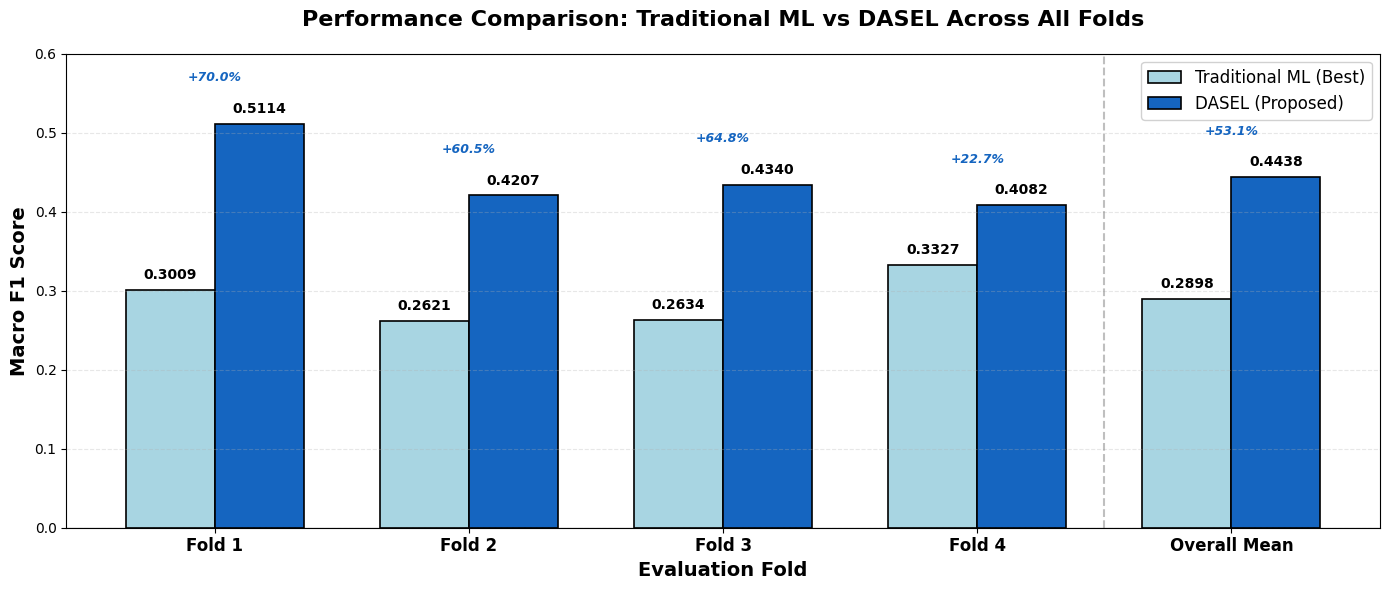

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Data from Table III - Variation 1 (best traditional) vs DASEL
traditional_scores = [0.3009, 0.2621, 0.2634, 0.3327, 0.2898]  # F1-F4 + Mean
dasel_scores = [0.5114, 0.4207, 0.4340, 0.4082, 0.4438]  # F1-F4 + Mean

# Calculate improvements
improvements = [((d - t) / t) * 100 for d, t in zip(dasel_scores, traditional_scores)]

# Create figure and axis
fig, ax = plt.subplots(figsize=(14, 6))

# Define positions for grouped bars
fold_labels = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Overall Mean']
x = np.arange(len(fold_labels))
width = 0.35

# Colors: light blue for traditional, bold/dark blue for DASEL
color_traditional = '#A8D5E2'  # Light blue
color_dasel = '#1565C0'  # Bold blue

# Create grouped bars
bars1 = ax.bar(x - width/2, traditional_scores, width, label='Traditional ML (Best)',
               color=color_traditional, edgecolor='black', linewidth=1.2)
bars2 = ax.bar(x + width/2, dasel_scores, width, label='DASEL (Proposed)',
               color=color_dasel, edgecolor='black', linewidth=1.2)

# Add value labels on top of bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.4f}',
                ha='center', va='bottom', fontsize=10, fontweight='bold')

# Add improvement percentages between bars
for i, (x_pos, improvement) in enumerate(zip(x, improvements)):
    y_pos = max(traditional_scores[i], dasel_scores[i]) + 0.05
    ax.text(x_pos, y_pos, f'+{improvement:.1f}%',
            ha='center', va='bottom', fontsize=9, fontweight='bold',
            color='#1565C0', style='italic')

# Customize plot
ax.set_ylabel('Macro F1 Score', fontsize=14, fontweight='bold')
ax.set_xlabel('Evaluation Fold', fontsize=14, fontweight='bold')
ax.set_title('Performance Comparison: Traditional ML vs DASEL Across All Folds', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(fold_labels, fontsize=12, fontweight='bold')
ax.set_ylim(0, 0.6)
ax.legend(loc='upper right', fontsize=12, framealpha=0.9)
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Add horizontal line at y=0
ax.axhline(y=0, color='black', linewidth=0.8)

# Add vertical separator before "Overall Mean"
ax.axvline(x=3.5, color='gray', linestyle='--', linewidth=1.5, alpha=0.5)

# Tight layout
plt.tight_layout()

plt.show()